In [1]:
import sys
import os
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.utils.estimator_checks import check_estimator
from sklearn.externals import joblib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.prediction_models.scorer import moving_average_score
from src.prediction_models.moving_average import MovingAverage

In [2]:
ts = joblib.load('../../bld/out/data_processed/BTC_POT.p.lzma')

In [3]:
# Restriction to chart data only
ts = ts[ts.CHART == True].dropna(axis=1).drop(['CHART', 'TRADE'], axis=1)

# Moving averages

Here, I will be demonstrating a moving average crossover strategy. We will use two moving averages, one we consider *fast*, and the other *slow*. The strategy is:

Trade the asset when the fast moving average crosses over the slow moving average.
Exit the trade when the fast moving average crosses over the slow moving average again.

The fast version is a 20-day moving average and the slow one a 50-day moving average.

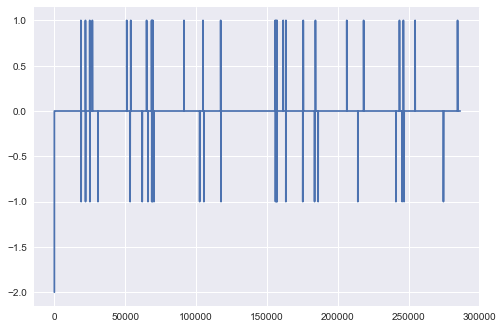

-0.921432061998


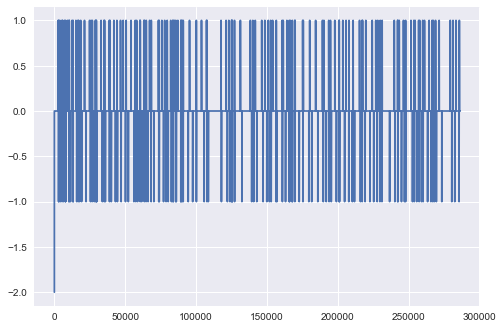

-8.0893030064


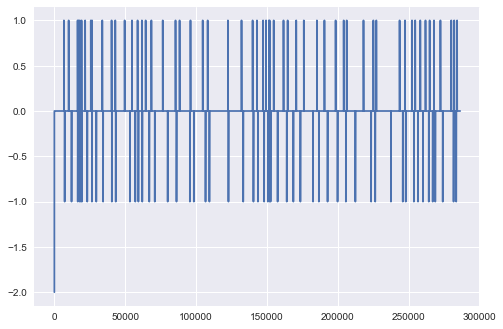

-1.60112996467


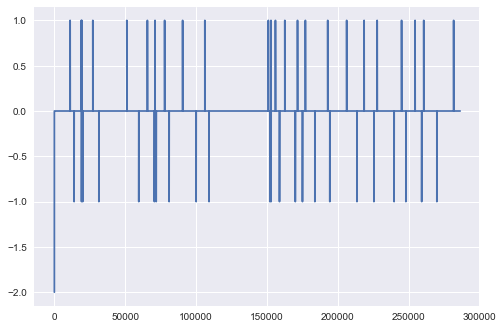

-0.710810874437


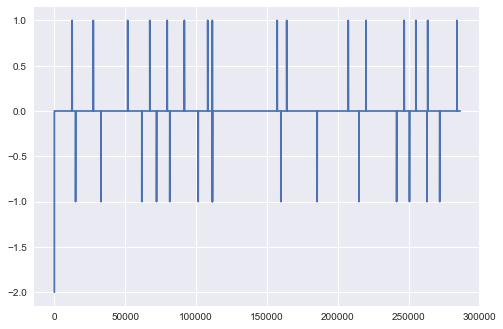

-0.591590376581


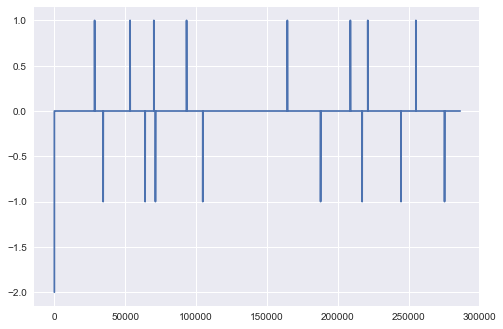

-0.223131893919


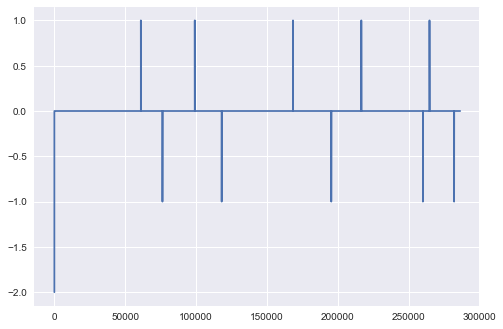

-0.0954245950049


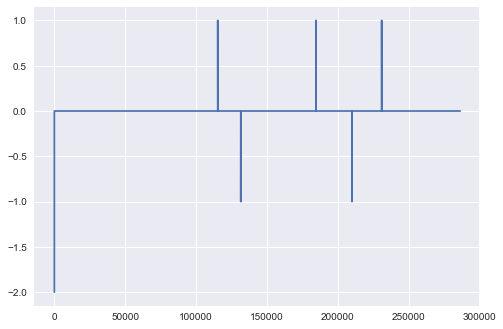

-0.0936766413979


In [4]:
for fast, slow in [[1, 50], [2, 5], [5, 10], [10, 20], [15, 30], [20, 50], [50, 100], [100, 200]]:
    # Correction to days
    fast *= 12 * 24
    slow *= 12 * 24
    ma = MovingAverage()
    ma = ma.fit(ts.BTC_POT_CLOSE, window_fast=fast, window_slow=slow)
    plt.plot(ma.signals)
    plt.show()
    plt.close()
    results = ma.predict()
    print(moving_average_score(ts.BTC_POT_CLOSE, results))

# Graphics

In [5]:
signals = ma.signals
regimes = ma.regimes
chart = ma.y
plot = chart.to_frame()
plot['SIGNALS'] = signals
plot['REGIMES'] = regimes

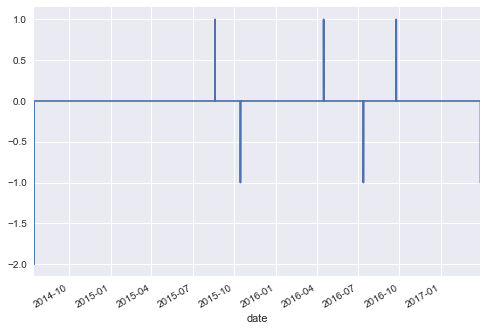

In [6]:
plot.SIGNALS.plot()

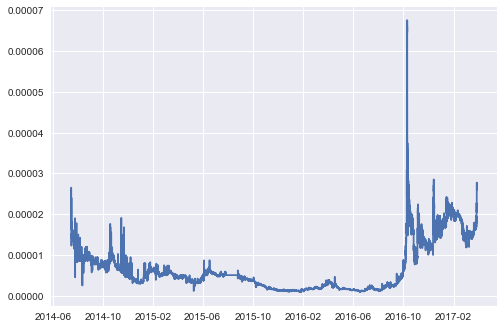

In [7]:
plt.plot(chart)

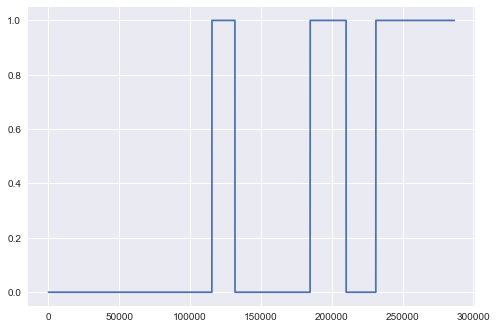

In [8]:
plt.plot(regimes)

[]

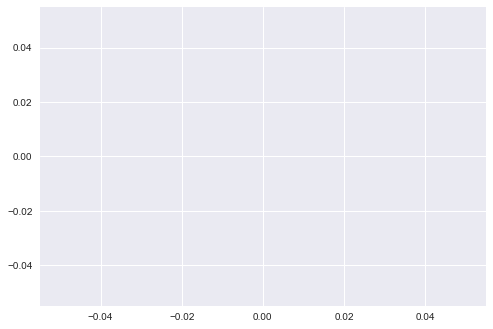

In [9]:
plt.plot()

In [46]:
trades = plot.BTC_POT_CLOSE[(plot.SIGNALS == -1) | (plot.SIGNALS == 1)].reset_index()
trades.rename(columns={'date': 'FROM', 'BTC_POT_CLOSE': 'BTC_POT_FROM'}, inplace=True)
trades['RETURNS'] = (trades.BTC_POT_FROM - trades.BTC_POT_FROM.shift(1)) / trades.BTC_POT_FROM
trades['BTC_POT_TO'] = trades.BTC_POT_FROM.shift(1)
trades['TO'] = trades.FROM.shift(1)
trades = trades[trades.index % 2 != 0]

In [47]:
trades

,FROM,BTC_POT_FROM,RETURNS,BTC_POT_TO,TO
1,2015-10-14 23:45:00,0.000003,-0.731959,0.000005,2015-08-19 13:15:00
3,2016-07-13 06:30:00,0.000002,-0.205263,0.000002,2016-04-16 06:05:00
5,2017-03-29 14:00:00,0.000026,0.843545,0.000004,2016-09-24 00:00:00


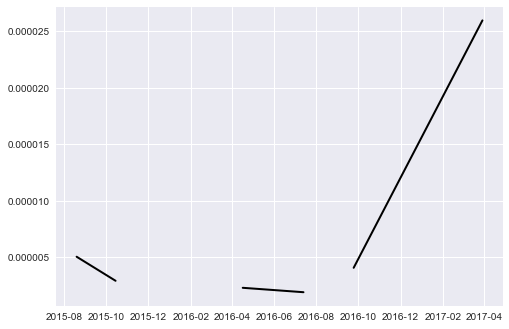

In [49]:
for row in trades.iterrows():
    plt.plot([row[1]['FROM'], row[1]['TO']], [row[1]['BTC_POT_FROM'], row[1]['BTC_POT_TO']], 'k-', lw=2)

# Test MovingAverage

In [50]:
from src.prediction_models.moving_average import MovingAverage

In [51]:
ma = MovingAverage()

In [56]:
ma = ma.fit(np.arange(1000))

In [57]:
print(ma)

In [13]:
check_estimator(MovingAverage)

TypeError: Cannot clone object '<src.prediction_models.moving_average.MovingAverage object at 0x00000121B77DEBA8>' (type <class 'src.prediction_models.moving_average.MovingAverage'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' methods.